# Introduction

# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Limit TensorFlow GPU memory usage

In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)  # init TF ...
config=tf.ConfigProto(gpu_options=gpu_options)  # w/o taking ...
with tf.Session(config=config): pass            # all GPU memory

# Load Dataset

In [3]:
dataset_location = '/home/marcin/Datasets/cat-dataset/cats/'

In [6]:
folders_train = ['CAT_00', 'CAT_01', 'CAT_02', 'CAT_03', 'CAT_04', 'CAT_05']
folders_valid = ['CAT_06']

In [7]:
files_list = sorted(os.listdir(os.path.join(dataset_location, folders_train[0])))

In [8]:
files_list

['00000001_000.jpg',
 '00000001_000.jpg.cat',
 '00000001_005.jpg',
 '00000001_005.jpg.cat',
 '00000001_008.jpg',
 '00000001_008.jpg.cat',
 '00000001_011.jpg',
 '00000001_011.jpg.cat',
 '00000001_012.jpg',
 '00000001_012.jpg.cat',
 '00000001_016.jpg',
 '00000001_016.jpg.cat',
 '00000001_017.jpg',
 '00000001_017.jpg.cat',
 '00000001_020.jpg',
 '00000001_020.jpg.cat',
 '00000001_024.jpg',
 '00000001_024.jpg.cat',
 '00000001_027.jpg',
 '00000001_027.jpg.cat',
 '00000001_029.jpg',
 '00000001_029.jpg.cat',
 '00000002_001.jpg',
 '00000002_001.jpg.cat',
 '00000002_003.jpg',
 '00000002_003.jpg.cat',
 '00000002_008.jpg',
 '00000002_008.jpg.cat',
 '00000002_026.jpg',
 '00000002_026.jpg.cat',
 '00000003_007.jpg',
 '00000003_007.jpg.cat',
 '00000003_009.jpg',
 '00000003_009.jpg.cat',
 '00000003_012.jpg',
 '00000003_012.jpg.cat',
 '00000003_013.jpg',
 '00000003_013.jpg.cat',
 '00000003_015.jpg',
 '00000003_015.jpg.cat',
 '00000003_020.jpg',
 '00000003_020.jpg.cat',
 '00000003_024.jpg',
 '00000003_02

In [9]:
import glob

In [13]:
wild_path = os.path.join(dataset_location, folders_train[0], '*.jpg')
image_files_list = sorted(glob.glob(wild_path))

In [14]:
image_files_list

['/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_000.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_005.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_008.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_011.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_012.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_016.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_017.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_020.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_024.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_027.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000001_029.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000002_001.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000002_003.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000002_008.jpg',
 '/home/marcin/Datasets/cat-dataset/cats/CAT_00/00000002_026.j

In [75]:
import PIL
import PIL.ImageDraw

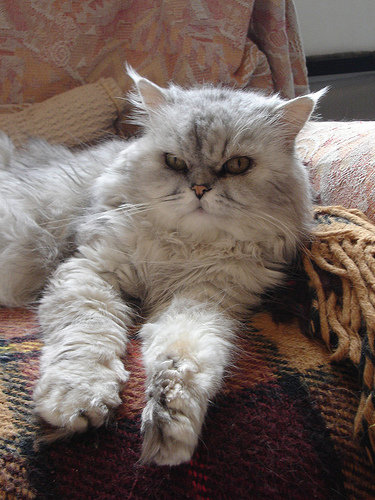

In [76]:
img = PIL.Image.open(image_files_list[0])
img

In [77]:
def read_landmarks(path):
    with open(path, 'r') as f:
        line = f.read()

In [78]:
path = image_files_list[0] + '.cat'
"""
    .cat file format is: 'nb_keypoints x1, y1, x2, y2, ...'
"""
with open(path, 'r') as f:
    line = f.read().split()  # [nb_keypoints, x1, y1, x2, y2, ...]
    keypoints_nb = int(line[0])
    keypoints_1d = np.array(line[1:], dtype=int)
    keypoints_xy = keypoints_1d.reshape((-1, 2))
    assert keypoints_nb == len(keypoints_xy)

In [79]:
keypoints_xy

array([[175, 160],
       [239, 162],
       [199, 199],
       [149, 121],
       [137,  78],
       [166,  93],
       [281, 101],
       [312,  96],
       [296, 133]])

In [74]:
def draw_keypoints(img, keypoints, r=3, c='red'):
    draw = PIL.ImageDraw.Draw(img)
    for x, y in keypoints:
        draw.ellipse([x-r, y-r, x+r, y+r], c)
    return img

In [83]:
img_kp = draw_keypoints(img.copy(), keypoints_xy)

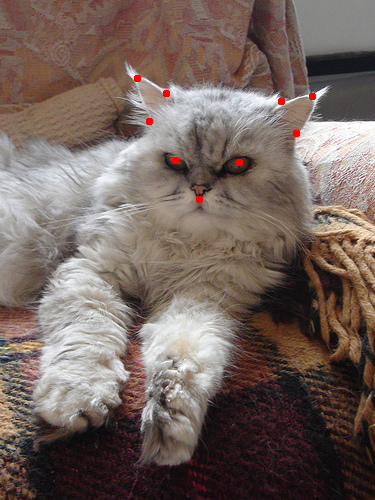

In [84]:
img_kp

In [96]:
width, height = img.size
ratio_w = width / 224
ratio_h = height / 224

In [97]:
ratio_w

1.6741071428571428

In [98]:
ratio_h

2.232142857142857

In [99]:
keypoints_new = np.zeros_like(keypoints_xy)

In [100]:
keypoints_new[range(len(keypoints_new)), 0] = keypoints_xy[:,0] / ratio_w

In [101]:
keypoints_new

array([[104,   0],
       [142,   0],
       [118,   0],
       [ 89,   0],
       [ 81,   0],
       [ 99,   0],
       [167,   0],
       [186,   0],
       [176,   0]])

In [102]:
keypoints_new[range(len(keypoints_new)), 1] = keypoints_xy[:,1] / ratio_h

In [103]:
keypoints_new

array([[104,  71],
       [142,  72],
       [118,  89],
       [ 89,  54],
       [ 81,  34],
       [ 99,  41],
       [167,  45],
       [186,  43],
       [176,  59]])

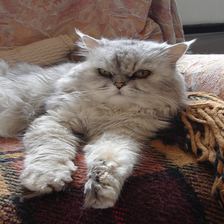

In [104]:
img2 = img.resize((224, 224), resample=PIL.Image.LANCZOS)
img2

In [105]:
img2_kp = draw_keypoints(img2, keypoints_new)

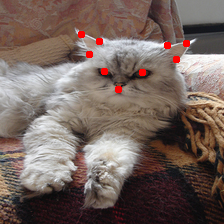

In [106]:
img2_kp